In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Read the data
df = pd.read_csv('/kaggle/input/german-credit/german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
# Delete the first column (0) because it only contains the index.
df.drop(df.columns[0], inplace=True, axis=1)

In [10]:
# Checking Null Value
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [16]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [17]:
# Count value categories every column
temp = ['Sex', 'Housing', 'Saving accounts', 'Checking account','Purpose']

for col in temp:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df[col].value_counts(), '\n')

Sex 
--------------------
Sex
male      690
female    310
Name: count, dtype: int64 

Housing 
--------------------
Housing
own     713
rent    179
free    108
Name: count, dtype: int64 

Saving accounts 
--------------------
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64 

Checking account 
--------------------
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64 

Purpose 
--------------------
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64 



#### EDA

In [18]:
# Function to generate plot of 3 num variabel by selected cats var
def scatters(df, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

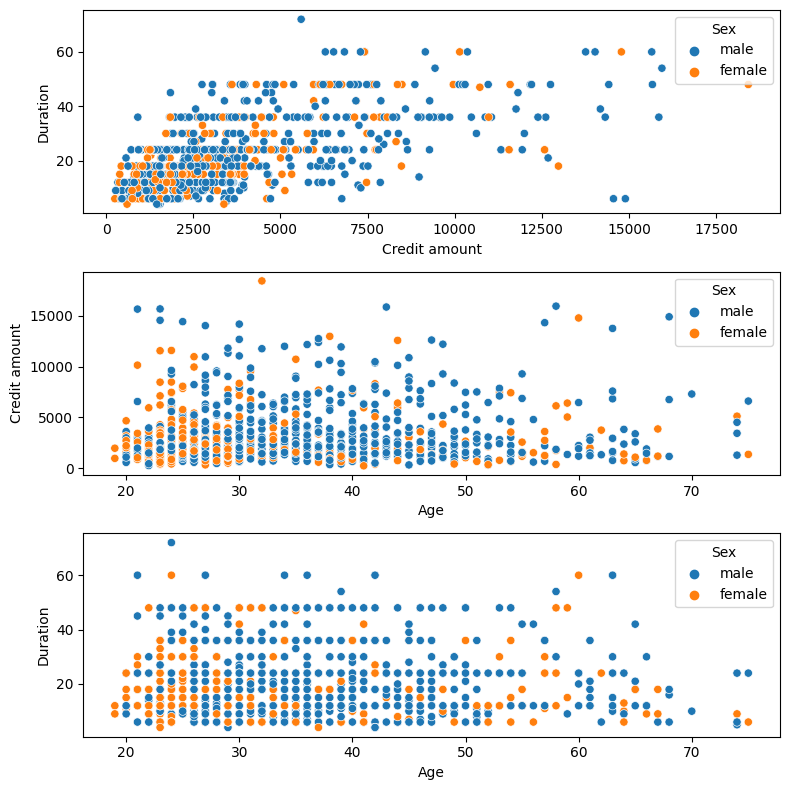

In [19]:
# Duration, Credit amount, Age by Sex
scatters(df, h="Sex")

- For the results of duration and credit amount on age, there is no significant correlation for both men and women.
- While for the duration on the credit amount, there is a pattern that for smaller credit amounts, the duration tends to be shorter.

- Furthermore, using linear correlation to further confirm it

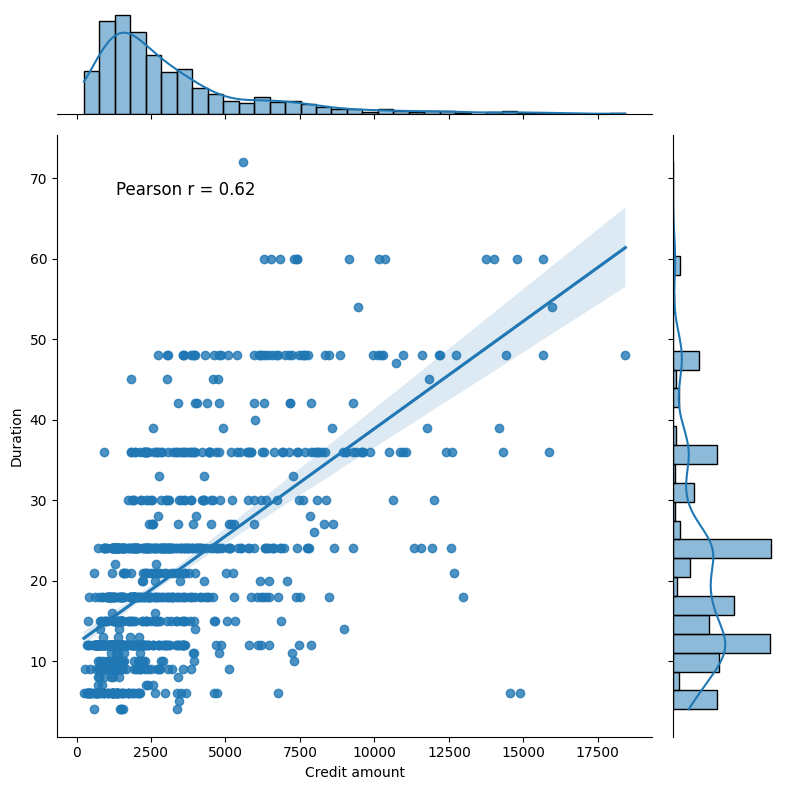

In [22]:
# Linier Corelation dan pearsonr
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Create jointplot
r1 = sns.jointplot(x="Credit amount", y="Duration", data=df, kind="reg", height=8)

# Count Pearson correlation
corr, _ = stats.pearsonr(df["Credit amount"], df["Duration"])

# Add corelation to the plot
plt.annotate(f'Pearson r = {corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.show()


Pearson r showing 0.62 means that there is a strong correlation between duration and credit amount.

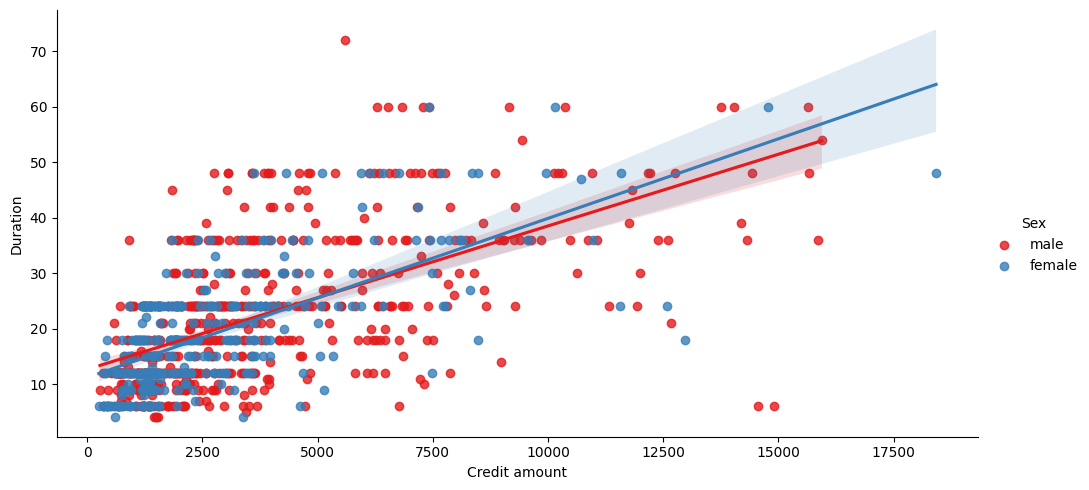

In [23]:
# Linier Regression with sex category
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

There is no significant difference between male and female credit owners

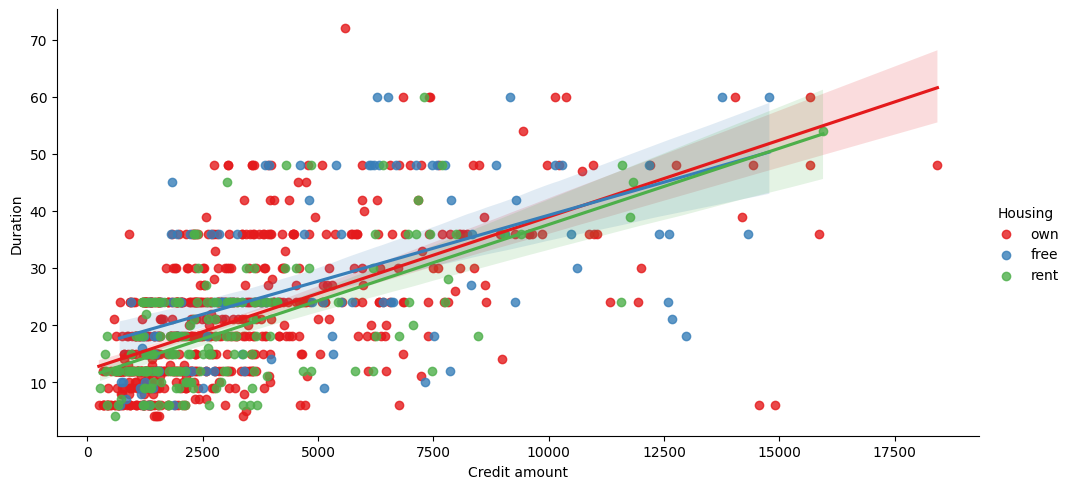

In [24]:
# Linier Regression with housing category
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

There is no significant difference between the categories of housing credit owners.

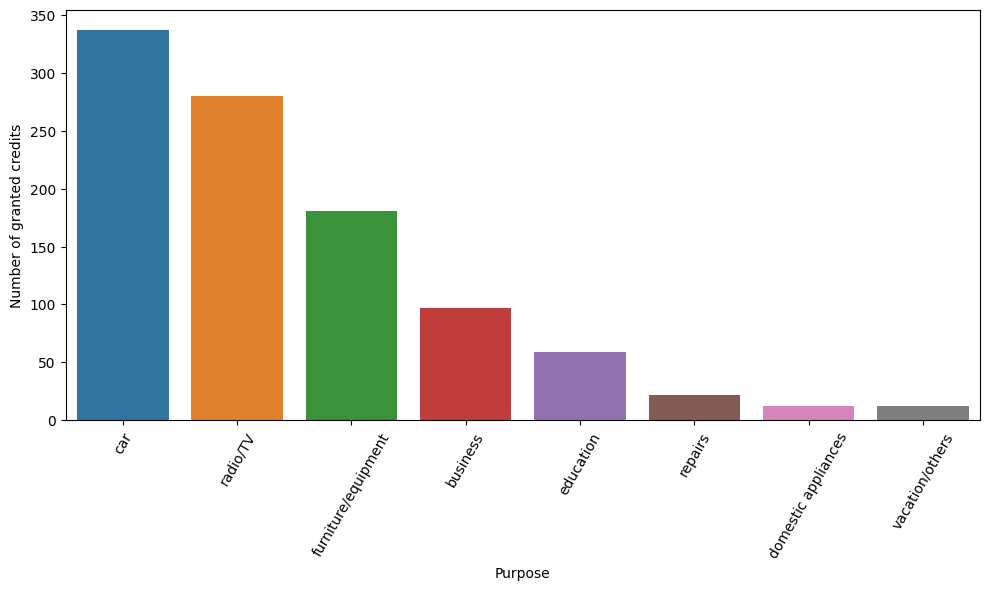

In [28]:
# Top purpose of credit usage
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

The barplot shows that credit is mostly used for cars and TV/Radio.

In [29]:
# Function for detailed analysis of categorical var
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

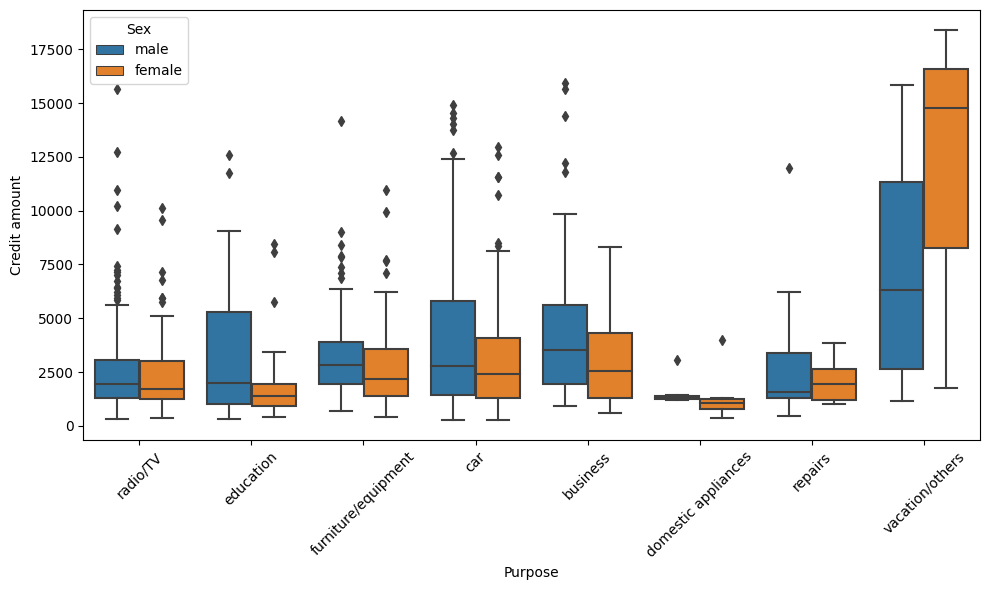

In [30]:
# Credit amount based on purpose for each sex category
boxes("Purpose","Credit amount","Sex")

The largest credit amount is used for vacation/others, while the smallest credit amount is used for domestic appliances.

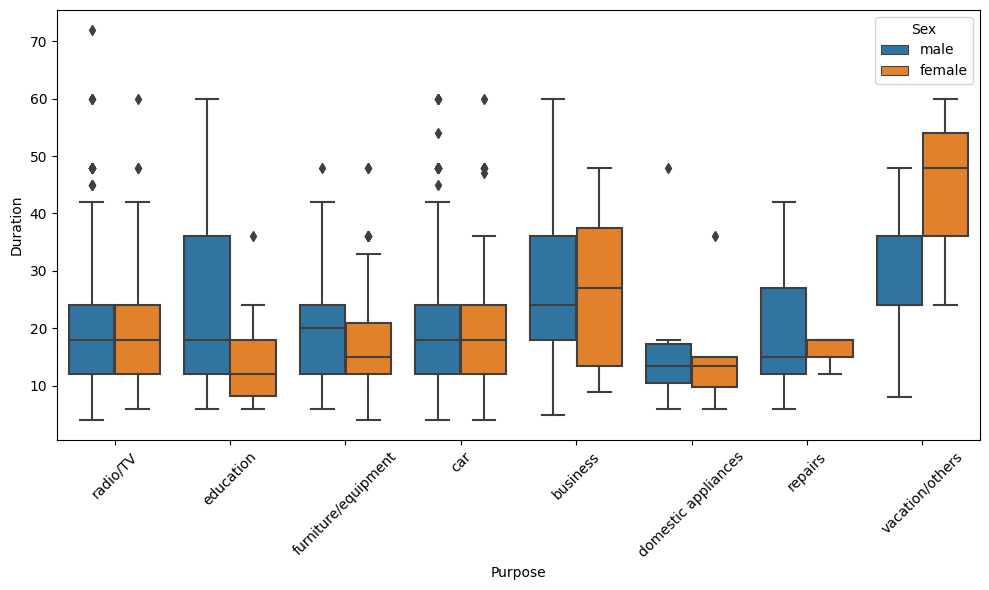

In [31]:
# Total duration based on purpose for each sex category
boxes("Purpose","Duration","Sex")

The longest credit duration is used for vacation/others for female but not for male.

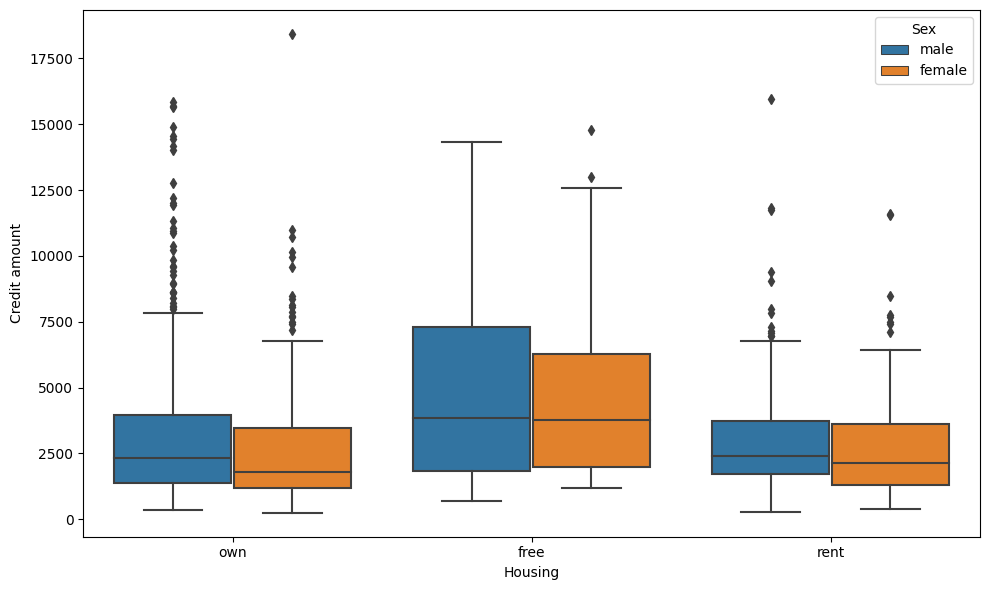

In [32]:
# Total credit amount based on housing for each sex category
boxes("Housing","Credit amount","Sex",r=0)

There is no significant difference for women and men for credit amount based on housing category.

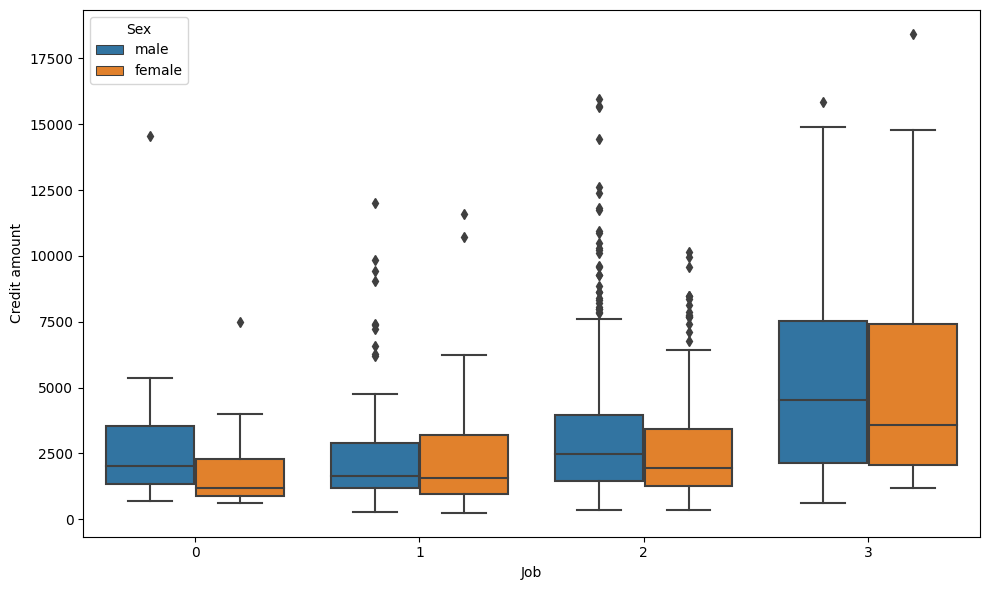

In [33]:
# Credit amount based on job for each sex category
boxes("Job","Credit amount","Sex",r=0)

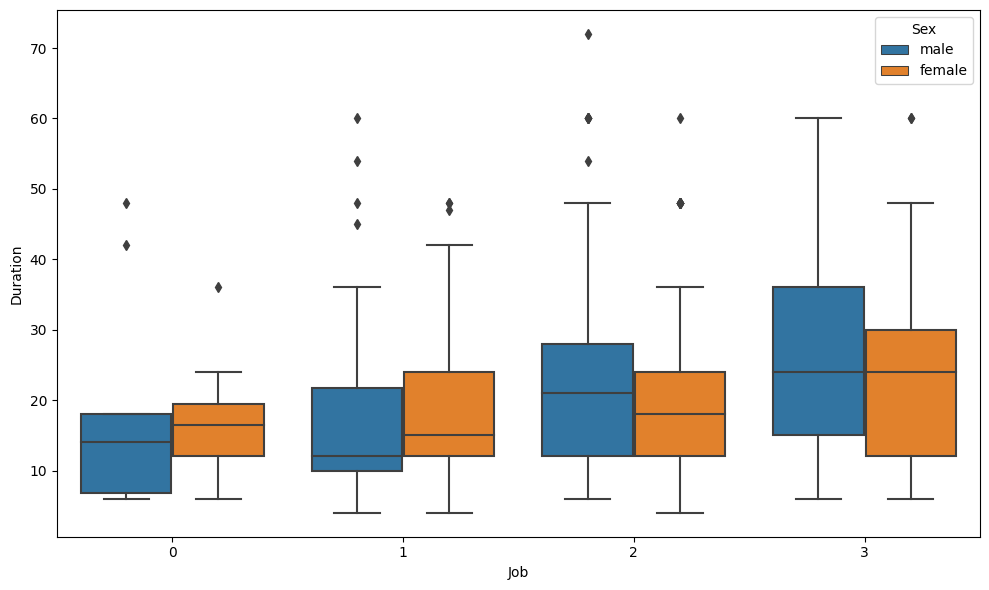

In [34]:
# Total duration based on job for each sex category
boxes("Job","Duration","Sex",r=0)

Both male and female whose jobs are in category 3 or highly skilled tend to have slightly more credit amounts and longer durations.

Text(0.5, 0, 'Age')

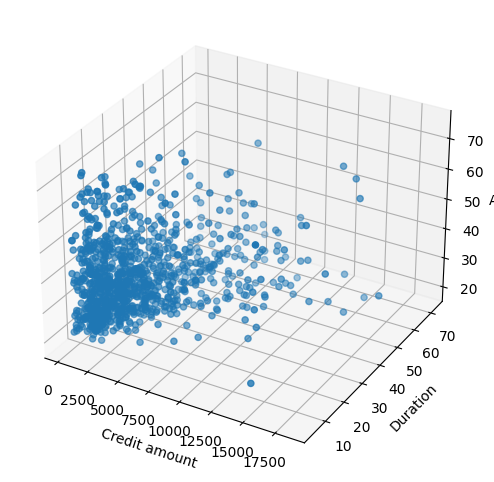

In [35]:
# 3d Axes for Credit amount, Duration, and Age
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

### Clustering with KMeans

In [36]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

In [37]:
# Function which plots three histogram 
def distributions(data):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(data["Age"], ax=ax1)
    sns.distplot(data["Credit amount"], ax=ax2)
    sns.distplot(data["Duration"], ax=ax3)
    plt.tight_layout()

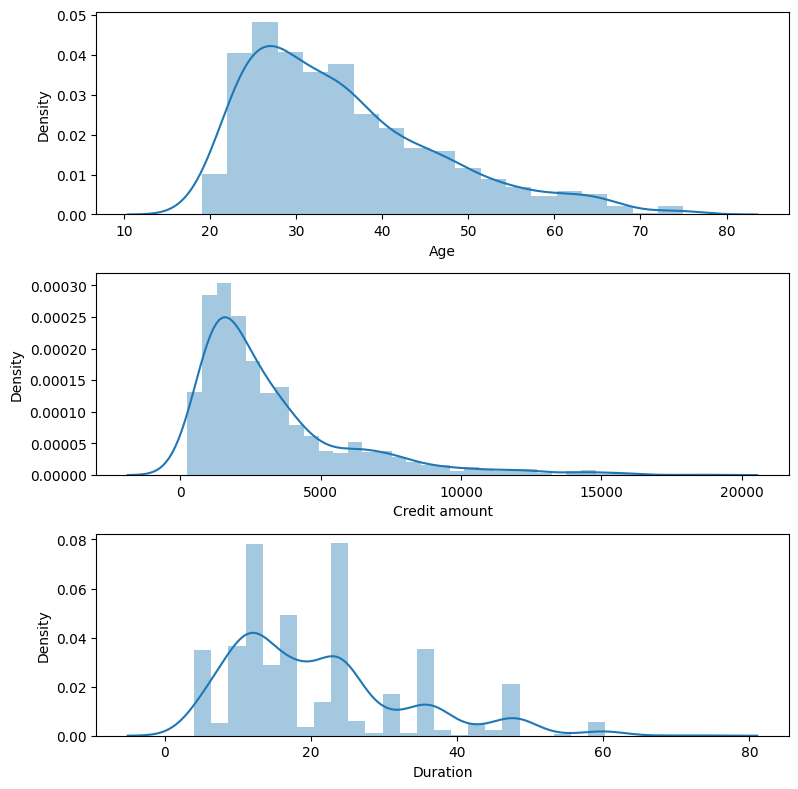

In [38]:
distributions(cluster_data)

The histogram plot result above is right-skewed. To produce better results, it is necessary to remove the skewed with logarithmic transformation.

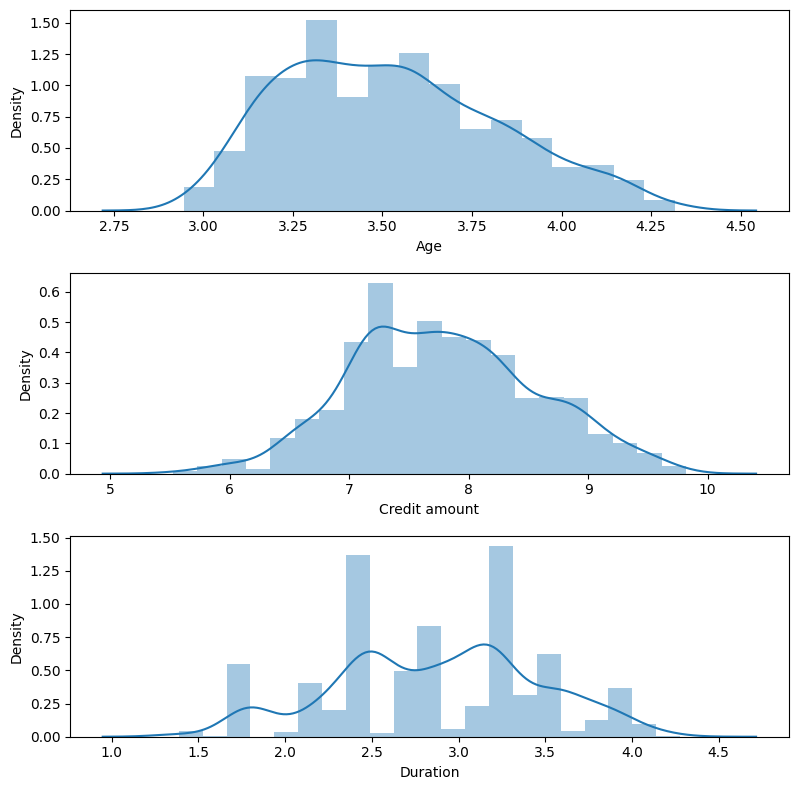

In [39]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

The Skewness has been eliminated

In [40]:
# Centering and Scaling of Variabels which will be required by the KMeans algorithm.
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

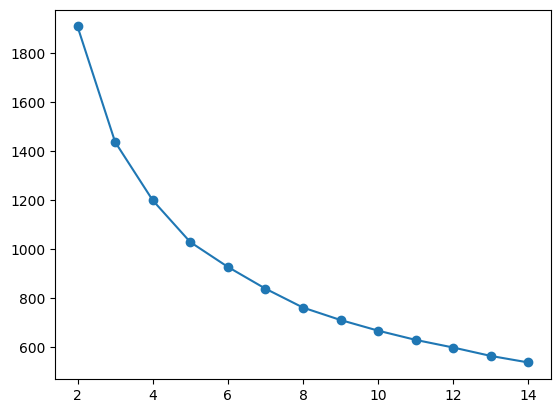

In [41]:
# check how inertia changes for various numbers of clusters.
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

- Inertia decrease with increasing number of clusters
- this method provides an assessment of cluster separation and placement of observations within their respective clusters.

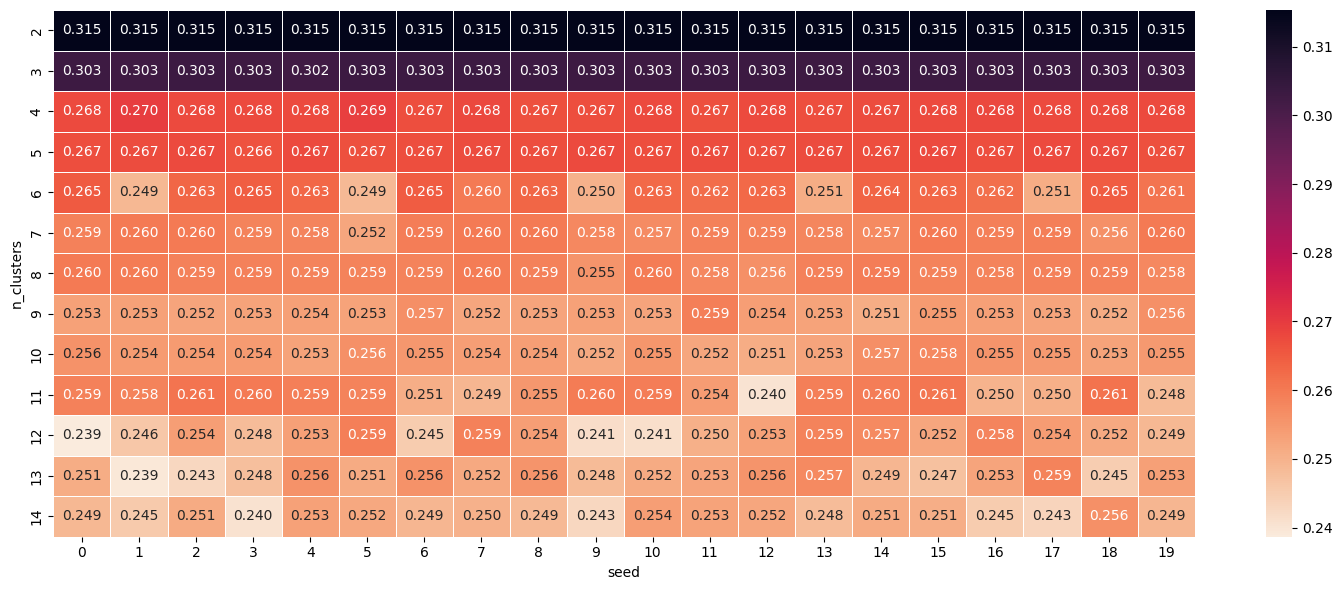

In [42]:
# selecting the best parameters for the K-Means model based on the Silhouette Score
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

The highest scores are for clusters 2 and 3 and are relatively insensitive to seed.

In [43]:
# chose 3 clusters to get more insight into data
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30255813750380023


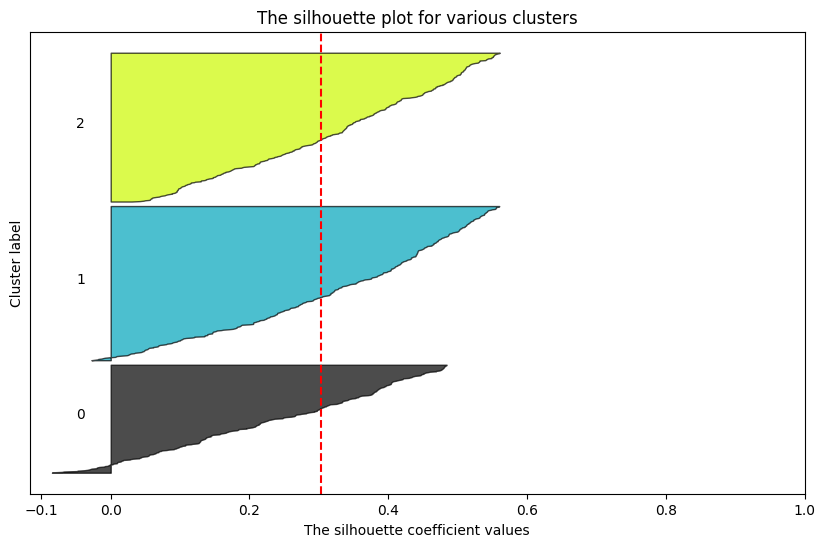

In [44]:
# silhouette graph for 3 clusters in order to visually depict fit of each point within its own cluster

import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

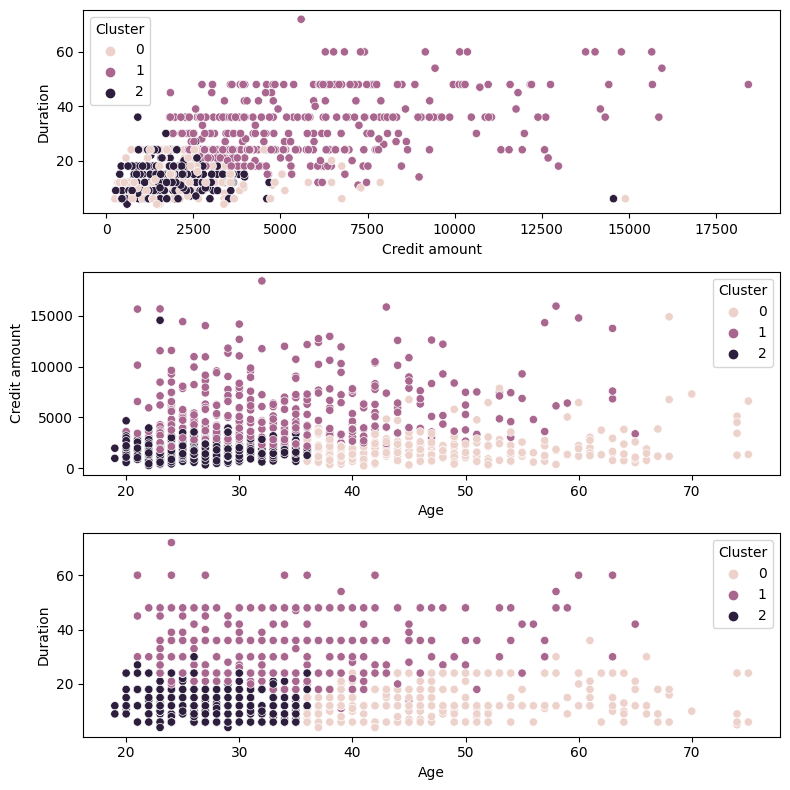

In [45]:
# showing clusters on the scatter plot.
scatters(clustered_data, 'Cluster')

The plot above shows three clusters formed. The second and third clusters show relatively clear cluster separation, but not so clear in the first cluster.

In [46]:
# Grouping Data Based on Clusters & calculate the average of each variable in each cluster.
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.5,1970.3,13.9
1,34.0,5665.4,32.2
2,27.7,1736.3,14.3


Cluster 0 – lower mean of credit amount, short duration, older customers

Cluster 1 – high mean of credit amount, long duration, middle-aged customers

Cluster 2 - lower mean of credit amount, short duration, young customers

### Clustering with Affinity Propagation

In this algorithm there are two relevant parameters: preference and dumping. That is, we do not specify the number of clusters at the beginning, the algorithm itself chooses the number. I will fix dumping and check the number of clusters based on the preference parameter.

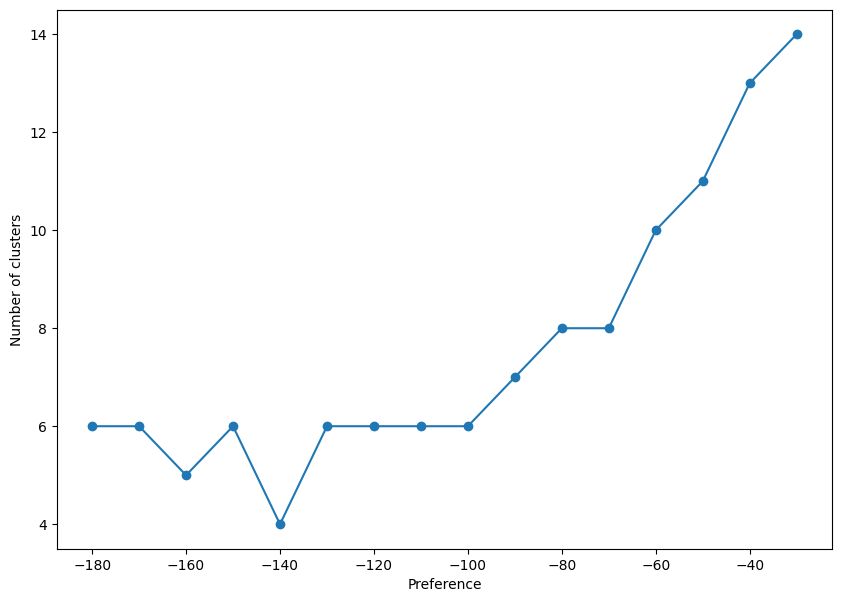

In [47]:
# evaluate the influence of preference parameters in the Affinity Propagation algorithm on the number of clusters produced
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

As the preference parameter value decreases, the number of clusters also decreases and the level for very small preference values. I will use the four cluster option.

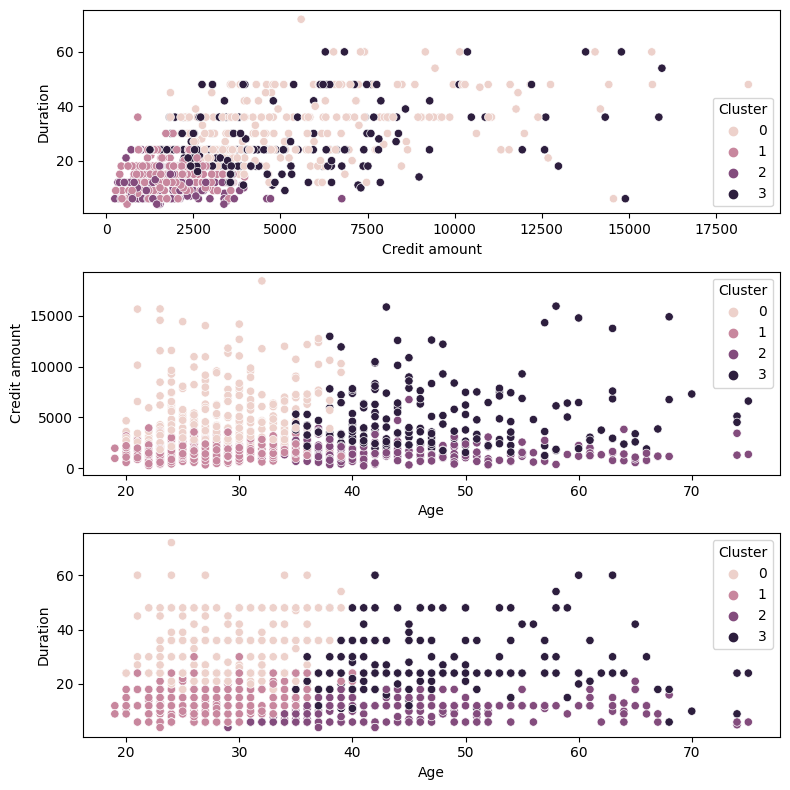

In [48]:
# showing clusters on the scatter plot.
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [49]:
# Grouping Data Based on Clusters & calculate the average of each variable in each cluster.
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers